In [1]:
from wbfm.utils.projects.finished_project_data import ProjectData

/home/charles/anaconda3/envs/wbfm38/lib/python3.8/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


# First, load a project using my class

In [2]:
fname = "/scratch/neurobiology/zimmer/Charles/dlc_stacks/2022-11-27_spacer_7b_2per_agar/ZIM2165_Gcamp7b_worm1-2022_11_28/project_config.yaml"
project_data_gcamp = ProjectData.load_final_project_data_from_config(fname)

ConfigFile  : INFO     =======================================
Project data for directory:
/scratch/neurobiology/zimmer/Charles/dlc_stacks/2022-11-27_spacer_7b_2per_agar/ZIM2165_Gcamp7b_worm1-2022_11_28 
With raw data in directory:
/scratch/neurobiology/zimmer/ulises/wbfm/20221127/data/ZIM2165_Gcamp7b_worm1/2022-11-27_15-14_ZIM2165_worm1_GC7b_Ch0-BH 

Found the following data files:
============Raw========================
red_data:                 True
green_data:               True
============Annotations================
manual_tracking:          True
============Segmentation===============
raw_segmentation:         True
colored_segmentation:     True
============Traces=====================
traces:                   True



# Check that the behavior annotation files were found

If not, you can run an approximate behavioral annotator based on pc1

In [3]:
project_data_gcamp.worm_posture_class

Posture class with the following files:
============Centerline====================
filename_x:                 True
filename_y:                 True
filename_curvature:         True
============Annotations================
filename_beh_annotation:    True
============Stage Position================
filename_table_position:    True

In [4]:
# OPTIONAL:
# from wbfm.utils.general.utils_behavior_annotation import approximate_behavioral_annotation_using_pc1
# approximate_behavioral_annotation_using_pc1(project_data_gcamp)

# Then use my class to plot a triggered average

In [5]:
from wbfm.utils.traces.triggered_averages import FullDatasetTriggeredAverages
triggered_class = FullDatasetTriggeredAverages.load_from_project(project_data_gcamp)

<Axes: title={'center': 'Triggered average for neuron_060'}, ylabel='Activity'>

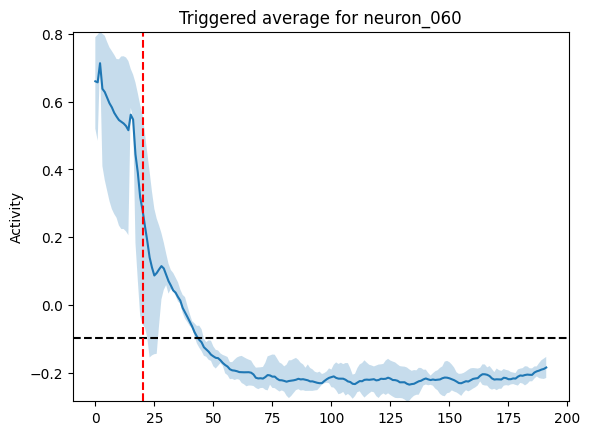

In [6]:
triggered_class.plot_single_neuron_triggered_average('neuron_060')

# Triggering to a different behavioral state

In [15]:
# All states are described in one class
from wbfm.utils.general.utils_behavior_annotation import BehaviorCodes
# help(BehaviorCodes)

In [11]:
# Pass in a dictionary to modify the triggered averages

trigger_opt = dict(state=BehaviorCodes.REV)
triggered_class = FullDatasetTriggeredAverages.load_from_project(project_data_gcamp, trigger_opt=trigger_opt)

<Axes: title={'center': 'Triggered average for neuron_060'}, ylabel='Activity'>

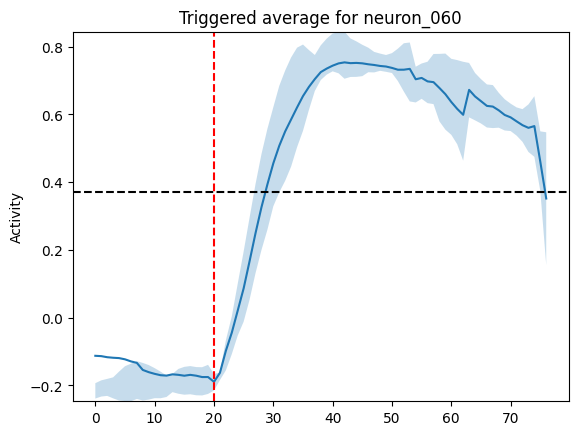

In [12]:
triggered_class.plot_single_neuron_triggered_average('neuron_060')

# Advanced: plot more than one on the same graph

<Axes: title={'center': 'Triggered average for neuron_033'}, ylabel='Activity'>

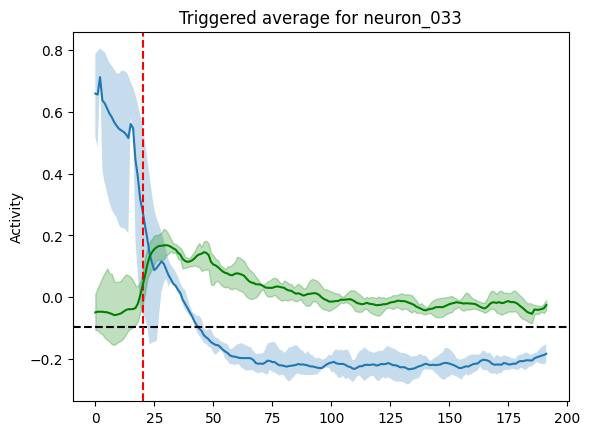

In [9]:
ax = triggered_class.plot_single_neuron_triggered_average('neuron_060')
triggered_class.plot_single_neuron_triggered_average('neuron_033', ax=ax, is_second_plot=True,
                                                    color='green')